## Introduction

This notebook will clean the collected data from the web scraper so that we can analyze it further as well as eventually build a dashboard (using Tableau) with it. After cleaning the data, we will analyze and visualize it to uncover insights.

## Table of Contents

<a href='#1.0'><b><h3>1.0 Loading Data<b></a><br>
<a href='#2.0'><b><h3>2.0 Cleaning Data<b></a><br>
<a href='#3.0'><b><h3>3.0 Data Analysis and Visualization<b></a><br>
<a href='#3.1'><b><h4>3.1 Average Values for Every Restaurant in Greater Vancouver<b></a><br>
<a href='#3.2'><b><h4>3.2 Number of Restaurants by Location<b></a><br>
<a href='#3.3'><b><h4>3.3 Average Number of Reviews per Restaurant by Location<b></a><br>
<a href='#3.4'><b><h4>3.4 Average Number of Photos per Restaurant by Location<b></a><br>
<a href='#3.5'><b><h4>3.5 Average Rating per Restaurant by Location<b></a><br>
<a href='#3.6'><b><h4>3.6 Top 10 Cuisines by Location<b></a><br>
<a href='#3.6.1'><b><h5>3.6.1 Top 10 Cuisines for All Locations in Greater Vancouver<b></a><br>
<a href='#3.6.2'><b><h5>3.6.2 Top 10 Cuisines for Particular Location in Greater Vancouver<b></a><br>
<a href='#3.7'><b><h4>3.7 Frequency of Restaurants by Price Range<b></a><br>
<a href='#3.8'><b><h4>3.8 Correlation Analyses<b></a><br>
<a href='#3.8.1'><b><h5>3.8.1 Number of Reviews to Photos<b></a><br>
<a href='#3.8.2'><b><h5>3.8.2 Number of Reviews to Average Rating<b></a><br>
<a href='#3.8.3'><b><h5>3.8.3 Number of Photos to Average Rating<b></a><br>
<a href='#4.0'><b><h3>4.0 Exporting Data to CSV for Tableau<b></a><br>

<a id='1.0'></a>
## 1.0 Loading Data

In [9]:
import pandas as pd
import numpy as np
import collections
import operator
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [10]:
directoryPath='raw data/'

restaurant_data = pd.DataFrame()
for file_name in glob.glob(directoryPath+'*.csv'):
    x = pd.read_csv(file_name, low_memory=False)
    restaurant_data = pd.concat([restaurant_data,x])
restaurant_data.shape

(5155, 10)

<a id='2.0'></a>
## 2.0 Cleaning Data

Dropping unnecessary columns and duplicates

In [11]:
restaurant_data.drop(columns=['Unnamed: 0'], inplace=True)
restaurant_data.drop_duplicates(inplace=True)
print(restaurant_data.shape)
restaurant_data.head(3)

(4957, 9)


,Location,Name,Rating,Price Range,Cuisine Type,Address,Phone Number,Num Reviews,Num Photos
0,Cariboo & Lougheed,Midam Cafe & Bistro,3.9,CA$45 for two,"Korean, Asian","North Road Centre, 110-4501 North Road, Burnab...",+16045685357,225,226
1,Cariboo & Lougheed,Cafe Tealips,4.3,CA$25 for two,Cafe,"7139 Arcola Way, Burnaby V5E1E9",+17783973972,299,104
2,Cariboo & Lougheed,House of Tofu Soup,4.3,CA$30 for two,"Korean, Asian","4563 North Road, Burnaby V3K3V8",+16044205254,309,155


**Insights:** Rating and price range needs to be converted to a number

In [12]:
restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4957 entries, 0 to 122
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Location      4957 non-null   object
 1   Name          4957 non-null   object
 2   Rating        4957 non-null   object
 3   Price Range   4957 non-null   object
 4   Cuisine Type  4956 non-null   object
 5   Address       4956 non-null   object
 6   Phone Number  4956 non-null   object
 7   Num Reviews   4957 non-null   int64 
 8   Num Photos    4957 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 387.3+ KB


**Insights:** Too many locations. This needs to be cleaned up

In [13]:
print(f'Number of unique locations is {restaurant_data["Location"].nunique()}')
restaurant_data['Location'].unique()

Number of unique locations is 44


array(['Cariboo & Lougheed', 'Coquitlam', 'Central Burnaby',
       'South Burnaby', 'Richmond', 'Central Richmond', 'Garden City',
       'City of Langley', 'Langley', 'Township of Langley', 'Cloverdale',
       'Downtown', 'Guildford', 'Newton', 'Dowtown', 'Coal Harbour',
       'Downtown Vancouver', 'The Fairmont Hotel Vancouver',
       'East Richmond', 'New Westminster', 'Fairview', 'Fleetwood',
       'Gastown', 'Grandview', 'Guilford', 'Hastings-Sunrise',
       'Kensington', 'Kitsilano', 'Maple Ridge', 'Mount Pleasant',
       'New Wesminster', 'North Delta', 'North Burnaby', 'Port Coquitlam',
       'Punjabi Market', 'Renfrew-Collingwood',
       'Riley Park & Little Mountain', 'South Surrey',
       'Victoria-Fraserview & Killarney',
       'Victoria-Frasierview & KIllarney', 'Marpole', 'West End',
       'Whalley', 'Yaletown'], dtype=object)

Replacing misspelled locations with their proper spelling

In [14]:
restaurant_data['Location']=(restaurant_data['Location']
.replace('Downtown','Downtown Vancouver')
.replace('Dowtown','Downtown Vancouver')
.replace('Victoria-Frasierview & KIllarney','Victoria-Fraserview & Killarney')
.replace('City of Langley','Langley')
.replace('Township of Langley','Langley')
.replace('The Fairmont Hotel Vancouver','Downtown Vancouver')
.replace('Garden City','Richmond')
.replace('Central Richmond','Richmond')
.replace('East Richmond','Richmond')
.replace('Guilford','Guildford')
.replace('New Wesminster','New Westminster'))

Number of unique locations have been cleaned and shrunk

In [15]:
print(f'Number of unique locations is {restaurant_data["Location"].nunique()}')
restaurant_data['Location'].unique()

Number of unique locations is 33


array(['Cariboo & Lougheed', 'Coquitlam', 'Central Burnaby',
       'South Burnaby', 'Richmond', 'Langley', 'Cloverdale',
       'Downtown Vancouver', 'Guildford', 'Newton', 'Coal Harbour',
       'New Westminster', 'Fairview', 'Fleetwood', 'Gastown', 'Grandview',
       'Hastings-Sunrise', 'Kensington', 'Kitsilano', 'Maple Ridge',
       'Mount Pleasant', 'North Delta', 'North Burnaby', 'Port Coquitlam',
       'Punjabi Market', 'Renfrew-Collingwood',
       'Riley Park & Little Mountain', 'South Surrey',
       'Victoria-Fraserview & Killarney', 'Marpole', 'West End',
       'Whalley', 'Yaletown'], dtype=object)

Replacing ratings with '-', which means no one has reviewed it on Zomato's, with nulls

In [16]:
restaurant_data['Rating']=pd.to_numeric(restaurant_data['Rating'].replace('-', np.nan))
restaurant_data['Rating']

0      3.9
1      4.3
2      4.3
3      4.1
4      4.3
      ... 
118    NaN
119    NaN
120    NaN
121    NaN
122    NaN
Name: Rating, Length: 4957, dtype: float64

Cleaning up the price range column so that it can be analyzed as a numeric value later

In [17]:
# transforming the price range column to a usable format
restaurant_data[['Price Range Per Person (CAD)']]=pd.to_numeric(restaurant_data['Price Range'].str.replace('for two','')\
.str.replace('CA','').str.replace('$',''))/2

<ipython-input-17-d81080637835>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  restaurant_data[['Price Range Per Person (CAD)']]=pd.to_numeric(restaurant_data['Price Range'].str.replace('for two','')\


In [18]:
# dropping the original price range row to tidy up the dataset
restaurant_data=restaurant_data.drop(['Price Range'], axis=1)
restaurant_data.head(3)

,Location,Name,Rating,Cuisine Type,Address,Phone Number,Num Reviews,Num Photos,Price Range Per Person (CAD)
0,Cariboo & Lougheed,Midam Cafe & Bistro,3.9,"Korean, Asian","North Road Centre, 110-4501 North Road, Burnab...",+16045685357,225,226,22.5
1,Cariboo & Lougheed,Cafe Tealips,4.3,Cafe,"7139 Arcola Way, Burnaby V5E1E9",+17783973972,299,104,12.5
2,Cariboo & Lougheed,House of Tofu Soup,4.3,"Korean, Asian","4563 North Road, Burnaby V3K3V8",+16044205254,309,155,15.0


<a id='3.0'></a>
## 3.0 Data Analysis and Visualization

<a id='3.1'></a>
### 3.1 Average Values for Every Restaurant in Greater Vancouver

In [19]:
# average rating for all ratings that exist per restaurant
print(f'Average rating for all restaurants in Greater Vancouver are {restaurant_data["Rating"].mean()}')
# average number of photos per restaurant
print(f'Average number of photos for all restaurants in Greater Vancouver are {restaurant_data["Num Photos"].mean()}')
# average number of reviews per restaurant
print(f'Average number of reviews for all restaurants in Greater Vancouver are {restaurant_data["Num Reviews"].mean()}')

Average rating for all restaurants in Greater Vancouver are 3.514651922593615
Average number of photos for all restaurants in Greater Vancouver are 39.177728464797255
Average number of reviews for all restaurants in Greater Vancouver are 56.19245511398023


<a id='3.2'></a>
### 3.2 Number of Restaurants by Location

**Insights:** Richmond, Downtown Vancouver, Coquitlam, Central Burnaby, and West End have the most restaurants. Richmond is a big geographical area with nearly 200000 people. Coquitlam is also a large area with 140000+ people and these locations have many restaurants by virtue of its population. Downtown Vancouver and Central Burnaby are very densely populated, thus will have a large number of restaurants. West End also is densely populated and is well known for having a vibrant food and shopping scene, especially along Denman, Burrard, Jervis, and Davie street.

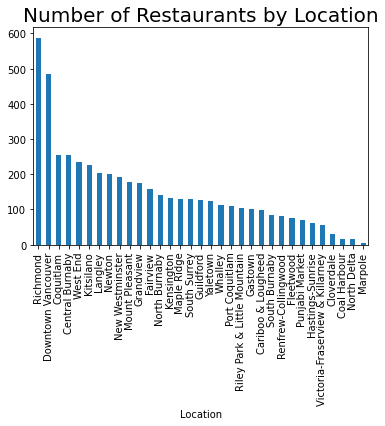

In [20]:
# Getting the number of restaurants each district in Greater Vancouver has
restaurant_data.groupby(['Location'])['Name'].count().sort_values(ascending=False).plot(kind='bar');
plt.title('Number of Restaurants by Location', fontsize=20);
plt.rcParams['font.size'] = '10'
plt.rcParams["figure.figsize"] = (15,5)

<a id='3.3'></a>
### 3.3 Average Number of Reviews per Restaurant by Location

**Insights:** Gastown, Riley Park & Little Mountain, Kitsilano, Yaletown, and West End have the highest number of reviews per restaurant. This makes sense as these are touristy areas and these areas are known for a lot of well known restaurants in the city.

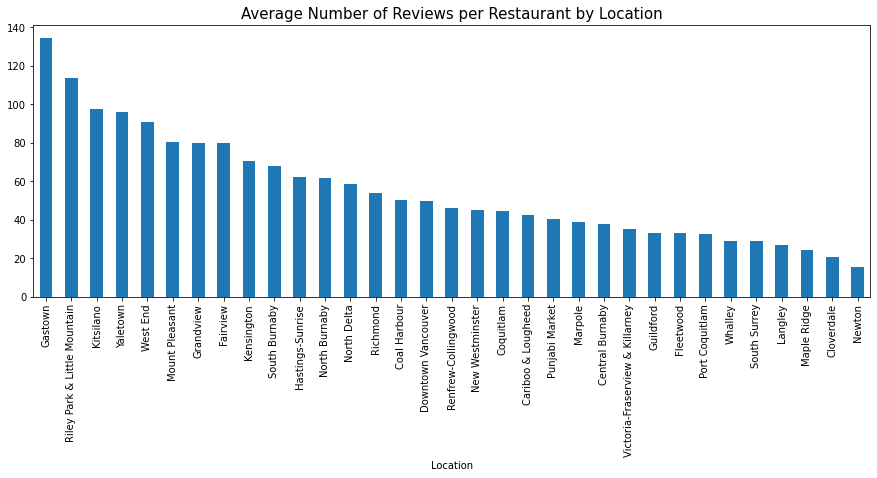

In [21]:
restaurant_data.groupby(['Location'])['Num Reviews'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average Number of Reviews per Restaurant by Location', fontsize=15);
plt.rcParams['font.size'] = '10'
plt.rcParams["figure.figsize"] = (15,5)

<a id='3.4'></a>
### 3.4 Average Number of Photos per Restaurant by Location

**Insights:** Riley Park & Little Mountain, Gastown, and West End have the highest number of photos per restaurant. This makes sense as Gastown and West End are touristy areas and these areas are known for a lot of well known restaurants in the city.

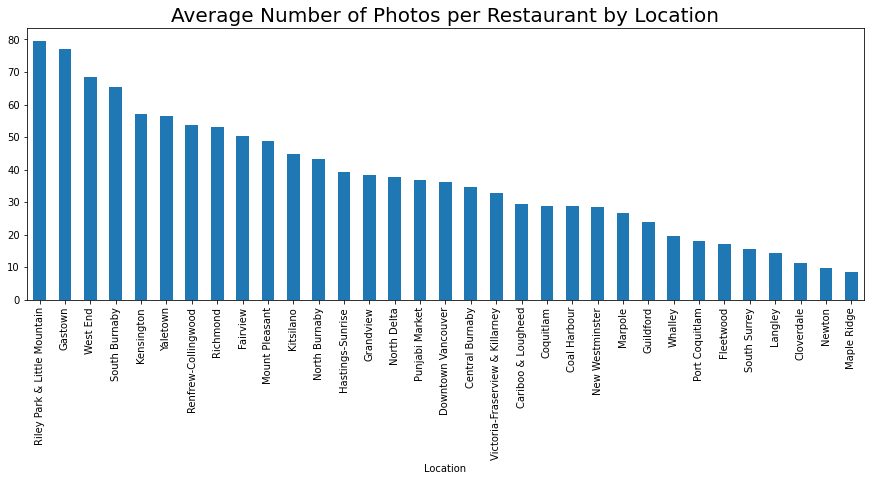

In [22]:
restaurant_data.groupby(['Location'])['Num Photos'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average Number of Photos per Restaurant by Location', fontsize=20);
plt.rcParams['font.size'] = '10'
plt.rcParams["figure.figsize"] = (15,5)

<a id='3.5'></a>
### 3.5 Average Rating per Restaurant by Location

**Insights:** There are not many differences in average restaurant ratings between the different locations within Greater Vancouver. This suggests that you can find good food almost anywhere you go in the city.

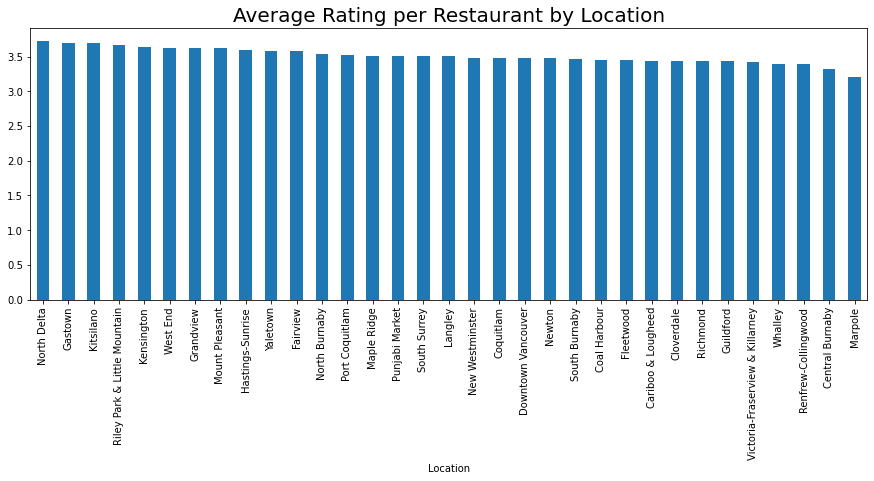

In [23]:
restaurant_data.groupby(['Location'])['Rating'].mean().sort_values(ascending=False).plot(kind='bar');
plt.title('Average Rating per Restaurant by Location', fontsize=20);
plt.rcParams['font.size'] = '10'
plt.rcParams["figure.figsize"] = (15,5)

<a id='3.6'></a>
### 3.6 Top 10 Cuisines by Location

<a id='3.6.1'></a>
#### 3.6.1 Top 10 Cuisines for All Locations in Greater Vancouver

In [24]:
def top_n_cuisine_types_by_location(df_raw, n=10, location='all'):
    
    # counting # of restaurants that do each cuisine type
    if location!='all':
        #df=df_raw[df_raw['Location']==location]
        df=df_raw[df_raw.loc[:,'Location']==location]
        district='district'
    else:
        df=df_raw.copy()
        district='districts'
    # splitting the list of cuisines into separate columns
    cuisine_type_rows=['Cuisine Type '+str(i+1) for i in range(len(df['Cuisine Type'].str.split(', ', expand=True).columns))]
    df[cuisine_type_rows]=df['Cuisine Type'].str.split(', ', expand=True)
    Cuisine_data_expanded=df[cuisine_type_rows]

    cuisine_counter={}
    for column in Cuisine_data_expanded.columns:
        for cuisine in Cuisine_data_expanded[column]:
            if cuisine!=None:
                if cuisine not in cuisine_counter:
                    cuisine_counter[cuisine]=1
                else:
                    cuisine_counter[cuisine]+=1

    # top 10 cuisines
    sorted_cuisine_counter = dict(sorted(cuisine_counter.items(), key=operator.itemgetter(1), reverse=True)[:n])
    
    # visualization of top 10 cuisine types in Coquitlam and Poco and Maple Ridge
    plt.rcParams['font.size'] = '15'
    plt.rcParams["figure.figsize"] = (25,10)
    plt.bar(list(sorted_cuisine_counter.keys()), list(sorted_cuisine_counter.values()), align='center');
    plt.title(f'Top {n} Cuisine Types in {location} {district} within Greater Vancouver', fontsize=20);
    plt.xlabel('Cuisine Type', fontsize=15);
    plt.ylabel('Number of Restaurants', fontsize=15);

**Insights:** The entire Greater Vancouver has the highest number of Asian restaurants in comparison to other cuisine types. Second comes fast food, followed by cafes, chinese, Japanese, and Sushi. This isn't too surprising given that Vancouver has a large Asian population and a vibrant coffee culture, hence the abundance of cafes. Furthermore, given that Vancouver has high quality seafood, Japanese and sushi restaurants can easily source high quality ingredients. Finally, Vancouver is home to a large Chinese population. Hence, there are a lot of Chinese restaurants.

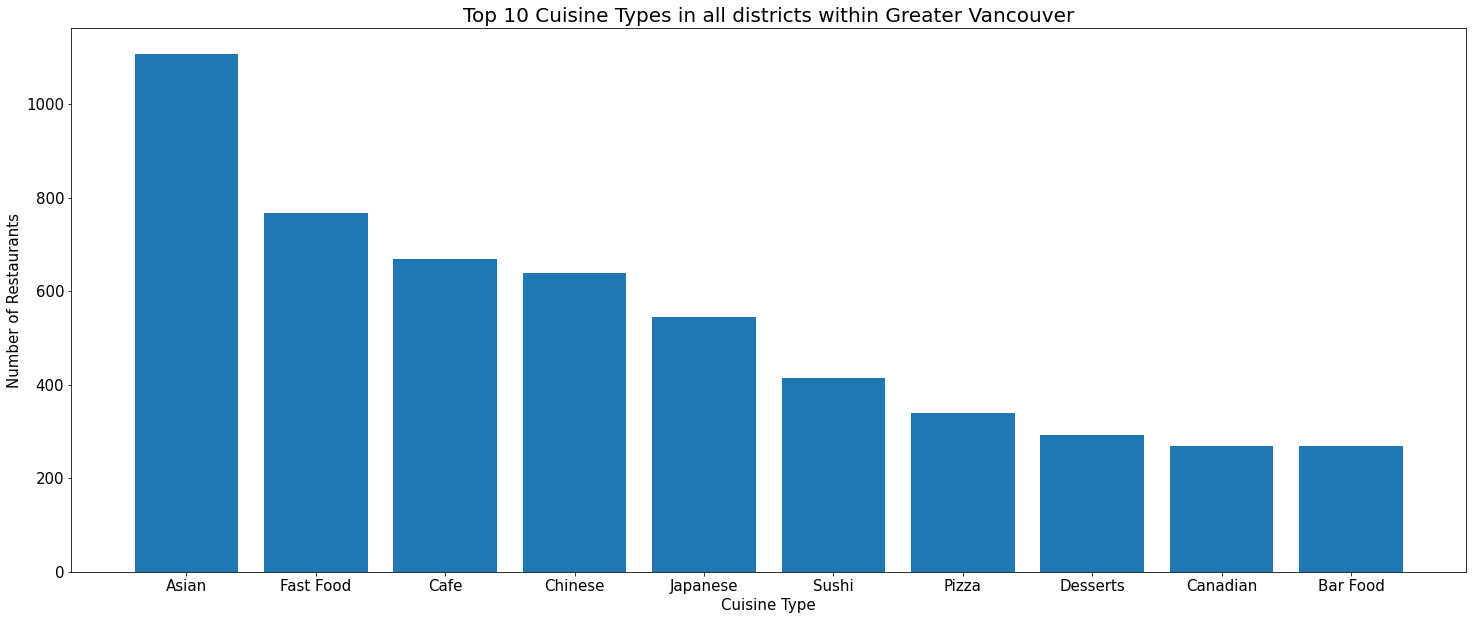

In [25]:
top_n_cuisine_types_by_location(restaurant_data)

<a id='3.6.2'></a>
#### 3.6.2 Top 10 Cuisines for Particular Location in Greater Vancouver

**Insights:** Coquitlam's top 10 cuisine types are mostly similar to the entire Greater Vancouver. What is unique about Coquitlam is that there is a large Korean population, hence Korean restaurants are third in the list.

C:\Users\Nathan Ling\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


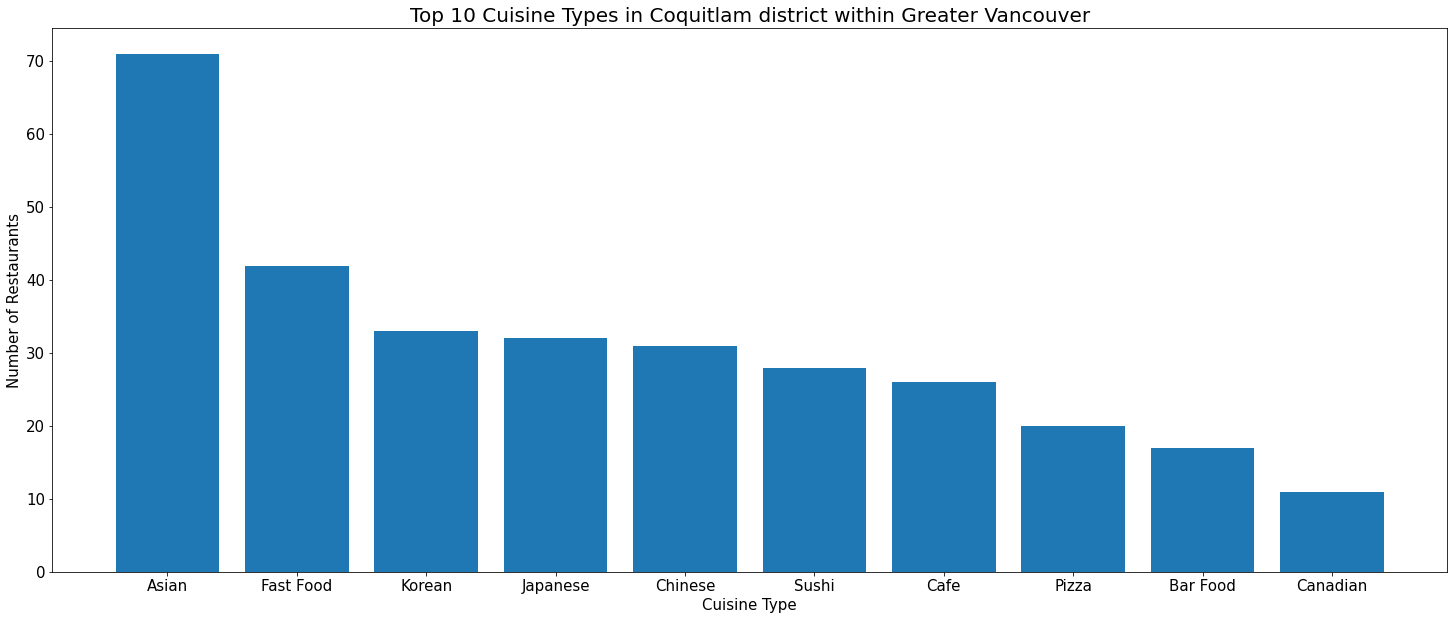

In [26]:
top_n_cuisine_types_by_location(restaurant_data, location='Coquitlam')

<a id='3.7'></a>
### 3.7 Frequency of Restaurants by Price Range

**Insights:** This finding is quite surprising, given that Vancouver is known for being a very expensive city. Given that one can get a meal for <$15 for the majority of restaurants in Vancouver is a bit hard to believe. This may be reflective of the data quality, as Zomato may not have updated its price ranges recently, especially considering how severe inflation has been in 2021.

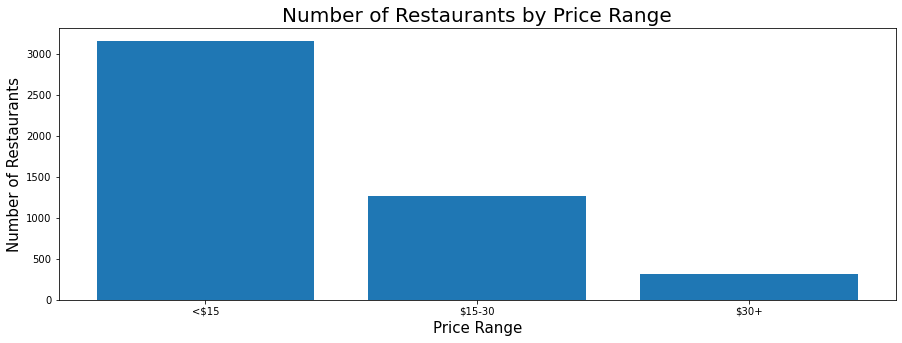

In [27]:
# finding the number of restaurants in each price range
NumCheapEats=len(restaurant_data['Price Range Per Person (CAD)'][restaurant_data['Price Range Per Person (CAD)']<=15])
NumMidRange=len(restaurant_data['Price Range Per Person (CAD)']\
            [(restaurant_data['Price Range Per Person (CAD)']>15) & (restaurant_data['Price Range Per Person (CAD)']<=30)])
NumExpensiveRange=len(restaurant_data['Price Range Per Person (CAD)'][restaurant_data['Price Range Per Person (CAD)']>30])

# number of restaurants by price range
plt.rcParams['font.size'] = '10'
plt.rcParams["figure.figsize"] = (15,5)
plt.bar(['<$15','$15-30','$30+'], [NumCheapEats, NumMidRange, NumExpensiveRange], align='center');
plt.title('Number of Restaurants by Price Range', fontsize=20);
plt.xlabel('Price Range', fontsize=15);
plt.ylabel('Number of Restaurants', fontsize=15);

<a id='3.8'></a>
### 3.8 Correlations Analyses

<a id='3.8.1'></a>
#### 3.8.1 Number of Reviews to Photos

**Insights:** There is a positive trend between reviews to photos. This makes sense as the number of reviews reflect how frequently patroned a restaurant is. The more people who visit a restaurant, the more photos that will likely be taken. However, at the very left of the graph, what is concerning is that there are a few restaurants that have many photos (200-1200 photos), but no reviews. This could either be an error on the webscraping process or bad quality data on Zomato's website.

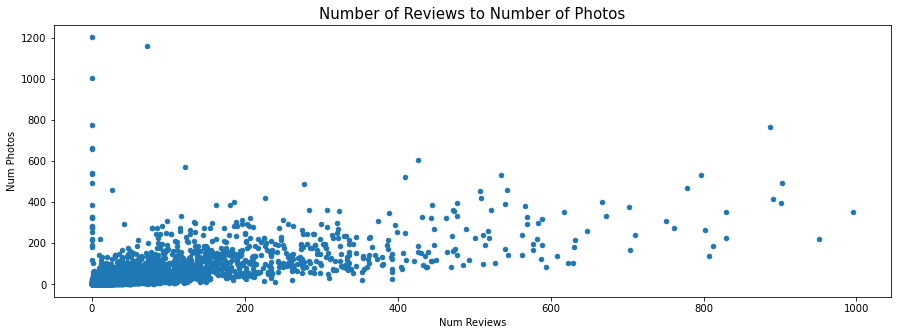

In [28]:
restaurant_data[['Num Reviews', 'Num Photos']].plot.scatter(x='Num Reviews',
                             y='Num Photos');
plt.title('Number of Reviews to Number of Photos', fontsize=15);

**Insights:** The correlation coefficient is 0.64. This implies a moderately positive relationship, supported by the visual above. https://statisticsbyjim.com/basics/correlations/

In [29]:
restaurant_data[['Num Reviews', 'Num Photos']].corr()

,Num Reviews,Num Photos
Num Reviews,1.000000,0.639241
Num Photos,0.639241,1.000000


<a id='3.8.2'></a>
#### 3.8.2 Number of Reviews to Average Rating

**Insights:** There is a positive trend between number of reviews to ratings. This makes sense as restaurants that have many reviews likely mean that the restaurant is frequently patroned, hence a sizable number of people believe the restaurant has high quality of food and service. However, at the very left of the graph, what is concerning is that there are a few restaurants that have no reviews yet there is a rating. This makes no sense and could either be an error on the webscraping process or bad quality data on Zomato's website. 

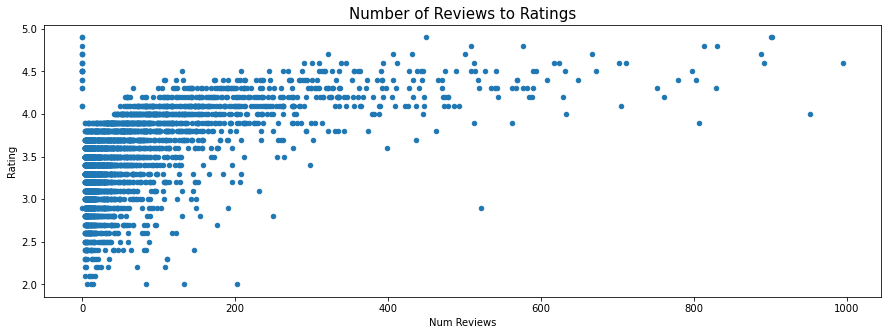

In [30]:
restaurant_data[['Num Reviews', 'Rating']].plot.scatter(x='Num Reviews',
                             y='Rating');
plt.title('Number of Reviews to Ratings', fontsize=15);

**Insights:** The correlation coefficient is 0.56. This implies a moderate positive relationship, supported by the visual above. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792

In [31]:
restaurant_data[['Num Reviews', 'Rating']].corr()

,Num Reviews,Rating
Num Reviews,1.000000,0.555016
Rating,0.555016,1.000000


<a id='3.8.3'></a>
#### 3.8.3 Number of Photos to Average Rating

**Insights:** There is a positive trend between number of photos to ratings. This makes sense as restaurants that have many photos likely mean that the restaurant is frequently patroned, hence a sizable number of people believe the restaurant has high quality of food and service.

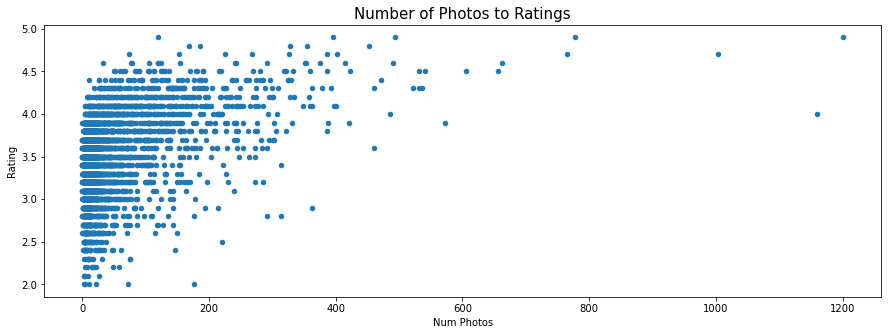

In [32]:
restaurant_data[['Num Photos', 'Rating']].plot.scatter(x='Num Photos',
                             y='Rating');
plt.title('Number of Photos to Ratings', fontsize=15);

**Insights:** The correlation coefficient is 0.42. This implies a weak to moderate positive relationship, supported by the visual above. https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792

In [33]:
restaurant_data[['Num Photos', 'Rating']].corr()

,Num Photos,Rating
Num Photos,1.000000,0.417301
Rating,0.417301,1.000000


<a id='4.0'></a>
### 4.0 Exporting Data to CSV for Tableau

In [35]:
restaurant_data_export=restaurant_data.copy()
cuisine_type_rows=['Cuisine Type '+str(i+1) for i in range(len(restaurant_data_export['Cuisine Type'].str.split(', ', expand=True).columns))]
restaurant_data_export[cuisine_type_rows]=restaurant_data_export['Cuisine Type'].str.split(', ', expand=True)
restaurant_data_export.drop(columns=['Cuisine Type'], inplace=True)
restaurant_data_export.head(1)

,Location,Name,Rating,Address,Phone Number,Num Reviews,Num Photos,Price Range Per Person (CAD),Cuisine Type 1,Cuisine Type 2,Cuisine Type 3,Cuisine Type 4,Cuisine Type 5,Cuisine Type 6,Cuisine Type 7,Cuisine Type 8
0,Cariboo & Lougheed,Midam Cafe & Bistro,3.9,"North Road Centre, 110-4501 North Road, Burnab...",+16045685357,225,226,22.5,Korean,Asian,None,None,None,None,None,None


In [36]:
restaurant_data_export.to_csv('cleaned and combined data/all-restauants-data.csv', index=False)